In [5]:
from __future__ import print_function, division
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #this just means apply the seaborn defaults to matplotlib

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [7]:
#Read in the CSV generated by the Year Scrape, and only bring in the URL column
directors_df = pd.DataFrame(pd.read_csv("challenge_2017_movies_detail.csv",index_col=0))

In [8]:
directors_df.head(5)

,url,worldwide gross,mpaa,budget,genre,runtime,close,rundays,3d,imax,series,directors
0,/movies/?id=starwars8.htm,1332539889,PG-13,NaN,Sci-Fi Fantasy,151,"April 19, 2018",126.00,1,1,1,Rian Johnson
1,/movies/?id=beautyandthebeast2017.htm,1263521126,PG,$160 million,Fantasy,129,"July 13, 2017",119.00,1,1,1,Bill Condon
2,/movies/?id=wonderwoman.htm,821847012,PG-13,$149 million,Action / Adventure,141,"November 9, 2017",161.00,1,1,1,Patty Jenkins
3,/movies/?id=jumanji2016.htm,962077546,PG-13,$90 million,Action,119,"May 31, 2018",163.00,1,1,1,Jake Kasdan
4,/movies/?id=marvel17a.htm,863756051,PG-13,$200 million,Action / Adventure,137,"September 21, 2017",140.00,1,1,1,James Gunn


In [9]:
#Read in the CSV generated by the Year Scrape, and only bring in the URL column
movies_df = pd.DataFrame(pd.read_csv("challenge_2017_movies.csv",index_col=0))

In [10]:
movies_df.head()

,rank,studio,total_box,max_sites,open_box,open_sites,open_date,url,title
0,1,BV,620181382,4232,220009584,4232,2017-12-15,/movies/?id=starwars8.htm,Star Wars: The Last Jedi
1,2,BV,504014165,4210,174750616,4210,2017-03-17,/movies/?id=beautyandthebeast2017.htm,Beauty and the Beast (2017)
2,3,WB,412563408,4165,103251471,4165,2017-06-02,/movies/?id=wonderwoman.htm,Wonder Woman
3,4,Sony,404515480,3849,36169328,3765,2017-12-20,/movies/?id=jumanji2016.htm,Jumanji: Welcome to the Jungle
4,5,BV,389813101,4347,146510104,4347,2017-05-05,/movies/?id=marvel17a.htm,Guardians of the Galaxy Vol. 2


In [11]:
#Merge!!! 
combined_df = pd.merge(movies_df,directors_df,on='url',how='left')

#Clean it up! 
combined_df = combined_df[["title","total_box","open_date","mpaa","runtime","directors"]]
combined_df = combined_df.rename(columns={"total_box":"domestic total"})

In [12]:
combined_df.head(10)

,title,domestic total,open_date,mpaa,runtime,directors
0,Star Wars: The Last Jedi,620181382,2017-12-15,PG-13,151,Rian Johnson
1,Beauty and the Beast (2017),504014165,2017-03-17,PG,129,Bill Condon
2,Wonder Woman,412563408,2017-06-02,PG-13,141,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,2017-12-20,PG-13,119,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,2017-05-05,PG-13,137,James Gunn
5,Spider-Man: Homecoming,334201140,2017-07-07,PG-13,133,Jon Watts
6,It,327481748,2017-09-08,R,135,Andres Muschietti
7,Thor: Ragnarok,315058289,2017-11-03,PG-13,130,Taika Waititi
8,Despicable Me 3,264624300,2017-06-30,PG,90,Pierre Coffin
9,Justice League,229024295,2017-11-17,PG-13,119,Zack Snyder


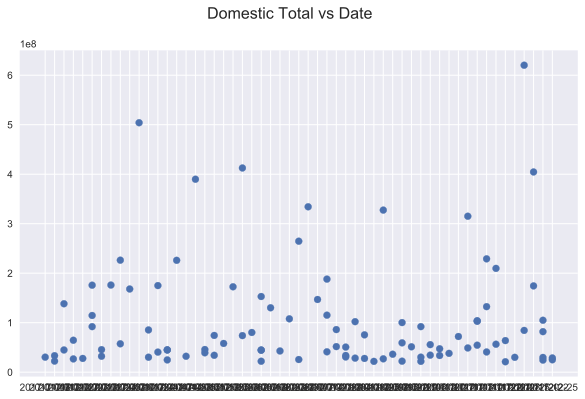

In [13]:
# Challenge 1:  Plot domestic total gross over time

plt.figure(figsize=[10,6])
x = combined_df["open_date"]
y = combined_df['domestic total']
plt.suptitle('Domestic Total vs Date',fontsize = 16)

plt.scatter(x,y);

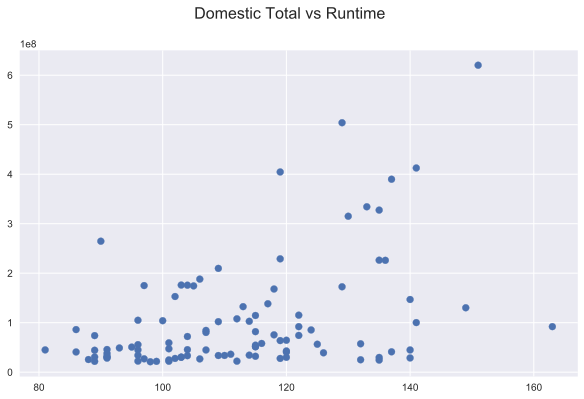

In [14]:
# Challenge 2 Plot runtime vs. domestic total gross.

plt.figure(figsize=[10,6])
x = combined_df["runtime"]
y = combined_df['domestic total']
plt.suptitle('Domestic Total vs Runtime',fontsize = 16)

plt.scatter(x,y);

In [15]:
# Challenge 3

# Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

rating_stats = combined_df.groupby(["mpaa"])["runtime","domestic total"].mean().reset_index()

In [16]:
x = rating_stats["mpaa"]
y1 = rating_stats["runtime"]
y2 = rating_stats["domestic total"]

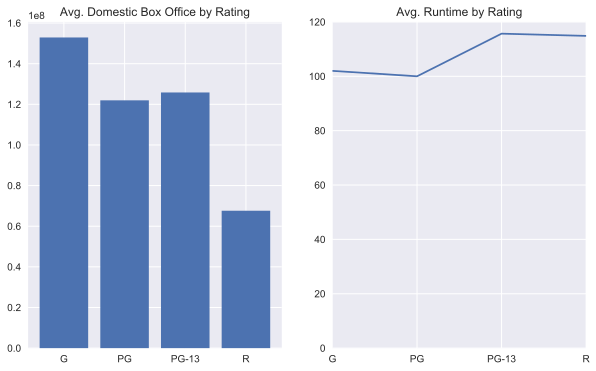

In [17]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.bar(x,y2)
plt.title('Avg. Domestic Box Office by Rating')

plt.subplot(1,2,2)
plt.plot(x,y1)
plt.title('Avg. Runtime by Rating')
plt.axis(['G', 'R', 0, 120]); # [x_min, x_max, y_min, y_max];

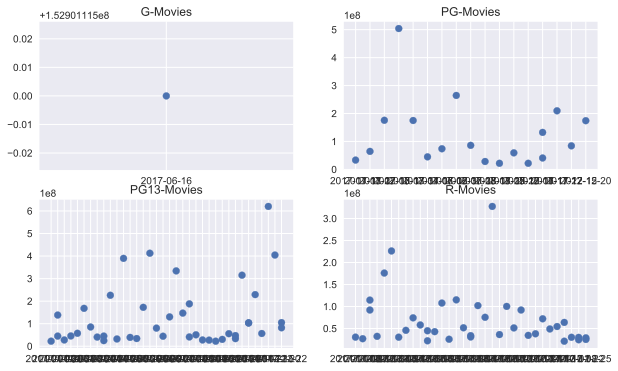

In [18]:
# Challenge 4

# Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot 
#the release date vs the domestic total gross.

plt.figure(figsize=[10,6])

plt.subplot(2,2,1)
plt.title('G-Movies')
x_g = combined_df[combined_df["mpaa"] == "G"]["open_date"]
y_g = combined_df[combined_df["mpaa"] == "G"]["domestic total"]
plt.scatter(x_g,y_g)

plt.subplot(2,2,2)
plt.title('PG-Movies')
x_pg = combined_df[combined_df["mpaa"] == "PG"]["open_date"]
y_pg = combined_df[combined_df["mpaa"] == "PG"]["domestic total"]
plt.scatter(x_pg,y_pg)

plt.subplot(2,2,3)
plt.title('PG13-Movies')
x_pg13 = combined_df[combined_df["mpaa"] == "PG-13"]["open_date"]
y_pg13 = combined_df[combined_df["mpaa"] == "PG-13"]["domestic total"]
plt.scatter(x_pg13,y_pg13)

plt.subplot(2,2,4)
plt.title('R-Movies')
x_r = combined_df[combined_df["mpaa"] == "R"]["open_date"]
y_r = combined_df[combined_df["mpaa"] == "R"]["domestic total"]
plt.scatter(x_r,y_r) ;

In [19]:
# Challenge 5

# What director in your dataset has the highest gross per movie?

director_stats = combined_df.groupby(["directors"])["domestic total"].mean().reset_index()
director_stats.sort_values(["domestic total"],ascending=False).head()

#Rain Johnson

,directors,domestic total
65,Rian Johnson,620181382
7,Bill Condon,504014165
62,Patty Jenkins,412563408
29,Jake Kasdan,404515480
32,James Gunn,389813101


In [20]:
# Challenge 6

# Bin your dataset into months and make a bar graph of the mean domestic total gross by month. 
# Error bars will represent the standard error of the mean.

In [21]:
def to_month(row):
    return datetime.strptime(row,'%Y-%m-%d').strftime('%Y-%m')

In [22]:
combined_df["month"] = combined_df["open_date"].apply(to_month)

In [23]:
month_stats = combined_df.groupby(["month"])["domestic total"].mean().reset_index()

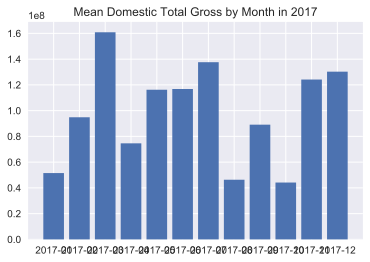

In [26]:
x = month_stats["month"]
y = month_stats["domestic total"]

plt.bar(x,y,yerr=True)
plt.title('Mean Domestic Total Gross by Month in 2017');